In [1]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs
import re
from Area import Area
from Punto import Punto

In [2]:
def introduceAreas():
    numero_areas=int(input('número de Areas: '))#.split(',')
    numero_vertuces=numero_areas*4
    areas=list()
    for j in range(1,numero_areas+1):
        print('coordenadas del área '+str(j)+':')
        user_input = Area()
        user_input.setLimites()
        areas.append(user_input)
    return areas

In [4]:
areas_input=introduceAreas()

número de Areas: 2
coordenadas del área 1:
intriduce coordenada X e Y separadas por "," 1:1,2
intriduce coordenada X e Y separadas por "," 2:2,3
intriduce coordenada X e Y separadas por "," 3:3,4
intriduce coordenada X e Y separadas por "," 4:4,5


coordenadas del área 2:
intriduce coordenada X e Y separadas por "," 1:5,6
intriduce coordenada X e Y separadas por "," 2:6,7
intriduce coordenada X e Y separadas por "," 3:7,8
intriduce coordenada X e Y separadas por "," 4:8,9




In [5]:
for e in areas_input:
    for p in e.getLimites():
        print(p.getX(),p.getY())

1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [6]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=2
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> connecting to 192.168.0.10 port 10940
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> sending "bytearray(b'\x02000EAR02\x00\x83\x03')"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> reciving "9000" bytes
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'\x020010AR02126B28\x03'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'\x02111BAR0200000000011110000000000'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'00006EB21F0000000000720072007200'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'73006B00720072007200710071007100'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'6C006D00720071006C00710072007200'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'720072006A0069006B00700069006900'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'6900

<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'C0050005000500051004F0051004E005'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'30052005200510050005000530054005'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'3005300540054005B005B005B005B005'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'F005F006000600061006200620062006'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'20062006800680064006400640064006'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'40066006600650065006400640068006'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'80068006800670066006600660066006'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'B006300630062006200620061005F005'"
<ipykernel.iostream.OutStream object at 0x00000168E6D34D68> received "b'E005E005F005F005B005B005C005D005'"
<ipykernel.iostream.OutStream object 

In [7]:
#Cadena con toda la información enviada por el láser
#sens='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800D800D000CF00CD00D300D300D300CA00CD00CA00C500C800CD00CD00CE00CE00C700C600C400C200C300C300BE00BE00BE00C200C600C600BC00BC00C300C300BA00BA00BB00BC00BA00BB00BC00BC00BC00B500B500B300B300B300B700B700B600B300B700B700B600B000B700B700B000AA00AA00AA00AA00AA00B100B100B100B200B200B100B100B100B100AC00AC00B100B100B100AC00B100B100AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800A800A0009F00A800A800A200A200A000A000A000A800A000A000A0009F009D0097009F00A000A000A0009F009700970097009F009F009B0097009700A000A000970097009700970097009B009B00A0009B009B0097009B009B009B00950095008E00920097009700940091008E008E008E008E009200940094008E008F009200930093009300960094009400940094008D008D008D008E009200970098009000900090009100910091008D008F00900090008C008C009200920091009100880088008D00900090008F008E008F009700930098009800950095008D008E008B008B008E0091008D008F008E0092009200940094009700970097009700970097009700920092009200970092009700970095009F00970097009700A000A000A000A000A000A000A000A000A000A000A000A000A000A000A000A0009B009F009F009F009D009D009F00A000A000A000A000A200A200AB009F00A0009F009F009F009F009F00AB00AB00A400A800A800AB00AB00AC00AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800AB00AB00AB00AF00B400AF00B200B400B400AD00AD00B200AB00AB00AF00B900BA00B900B500B600B900B800B500B400B500B800B800BF00B700B700B700BE00BD00BE00BD00BD00BD00C500C800C800C400C400C700C700CD00CD00C700C600C600C500C700CF00CF00C700C700CE00CE00CE00CE00D300D300D600D600D000D000D000D600D600D600D600D600D600DF00E000E000E000E900E900E900E900E600E600F400F400ED00ED00F500F800F800F800F100F800F800F800F800F200FB00FC00F500F500FD00FE01060107010B010E010E0107010B0116010F01140116011D011D012301230121012101250125012D012D012D01290129012D012E0139013401330136013E013E013C013C014001400148014E014F014F01520152015301570157015A015A015C0161016701700176016F016B016B016E01700170017B01790176017901840188019901940194019401A001A201A601AF01AF01AE01AF01C401C401C301CA01D501D601DA01E601EE01EF01F90206020F021102260234023E02500250025B026B0284028A029702AD02BC02D802FA03060315032903410355036303760370036F036F036E036D036E0370036E03680361035E0348034502C1021D01D401D201F0026D02DE02E902DD02CA02B202A2024E01830148011600FB00EE00E700E700E600E800E700E700E400D500DE00DC00DB00D500D500CF00DB00D300D100CF00CD00C400C400C900C400C400BF00BF00BA00BA00C200C100BF00BF00BE00BD00BD00B500B400B300AA00AC00AC00AC00AD00AD00AC00A500A500A5009C009C00A200A500A5009F009F009F009F009F00980098009C009A00A100A000A0009D009900970099009900960092008C008C008D008D008C008C008C008D008D008D009600960096009600970097009700960092008E008D008D008E008E008F008F008E008E0089008900890089008E008D008C008C008C00840089008900890089008C008C008A008A008A008A0089008A008A008A008A008A0086008A008A008A008B008B008200820082007A007A007B0084007B007B007B007B007C007C007C007C007B007C008100810081008100810081007E007E007E007E007E00840084007E007C007500730071007300730073007500750075007C007C00780078007700760071007100680068006800680066006B006C006C006C00710071006C006C006E006C006C00680068006800680068006B0071006B007100780078007C007C00780076007400740079007B007D0083008A008B008A008800880089008B008B00900090008D0088008F00C50140017F01B601EB021B027102F0044D047C048804A204AA04B2050605CA0ADC0AF20AF2066606660C960CE20CCC0BEF0BED0BF40CDA0CF50CF50CEE0CEA0CE10CDA0CD70CCC0CC80CC00CC00CB10CA20CA10C9D0C8E0C8B0C810C780C8A0CB10CC20CEB0D110D430D4306B706AD0641064306350623062406270627062E06380636063C06350662AE78\x03\x02111BAR0200000000011110000000000000005DA1E0000000001AA0188018801BA021F02410241022F019301930219029C02BA02CE02E7030703CE04C604F704CC04FD04FE04F20513056C058E05B805DB05CF05C505AC05AF05900596059105B904D502E3027A027A02DA03DD040603FE03F203F203C2039D0390033102C1028E02E6033F034C03540349032203160316031202C0025A02490249027F02AF02A7024C023B023E02580258023F023F02420293030E031002E902850278027E02D002DD02DB02CC02CA02B6027302720271025102410241025C02A7029202750275027E0268024A02440250025E026802A102A902A902AC02A6029B0292028D028402730264025A024B024B022E022902200218020A020101FE01ED01EB01E701E301D601D201C801C301BC01B801AA01A901A4019701960196019F019901990189018501850185018401800180017901760172016C016C016901670160015D015801560156014F014F014D014D0149014D0147014701450140013C013B013B013A013B0139013B013901390135012F012F012E012E0125012501250124011D01160111010300F700EF00EE00EF00E900E800E500E000DD00DD00E200E600E900F100F100EB00E100E100E100E300EA00EE00EE00EE00EE00EE00EE00EE00EE00EE00EE00E300E200E100E100E000DE00DE00E000E000E000E000E000DC00D700D700E000DF00DC00D500D300D300D300D300D300D400D100D400CE00D400D400CB00C600CB00C600C400C600CE00CE00CE00C800C800C100BF00BC00BF00BF00C000BB00BB00C300C500C400C400BC00BC00BC00BC00BC00B400B300B500B500B500B400B100B100B200B200B400B800B200AF00B000B700B300B400B400B400B400B400B400B400AC00AC00B100B100B100B100B500B100B100B100B100B100B000B100AE00AE00A900A900A900A900A500A500A900A300A000A000AC00AC00AC00AC00A300A300A300A100A500A300A300A900A300A100A0009800A300A300A100A100A100A100A100A100A100A100A10098009500A000A000A000A000A000980098009C009C009C009700970098009800970097009400940097008E0095008E009500950095009000900090008C008C0095008E008C008C009300950093008F00930097009700970095008D008D008D008B00860090009000900091009800910099009100910092009200910091008800880089009300930093008A008A00910091008D0091009100910091009800980097008F008F009500950091009A009A00940094008B00960095009300930097009700920090009500970097009700930093009300920093009800980098009800980098009C009C009800980098009C00A10098009800A100A100A100A100A100A100A100A100A100A000A000A100A100A000A000A0009D00A100A900A900A900A900AC00A900A900A300A100AC00AC00AE00A900A900A900AC00AC00A900A900A500A500A900A900A900AE00AE00AE00AE00AE00AE00B100B100B100B500B500B500B100B500B500B500B500B500B500B500B500BB00BB00BB00BA00BB00BA00BA00B900B400B900B900BF00BF00BA00B700B700B500B500B700BE00BF00B600B600C600C600C600C600C500C500C600C900C900C900C400CC00CC00CC00CC00CC00CB00CB00C800D000CF00CF00CD00CF00CF00DA00DA00DA00D400D400D300D700D800DD00DD00D700D700D800DE00DE00E100E100E900EA00ED00F100F100F100F800F800F100F100F100F100F900FB00F900F200F400F400F600FD00F900F900FB00FD00FE00FE01060108010D010F010B011601110111011D011D011D011A0125012501220125012B012B01250125012D012D012D012D012D012E0133013E013E013601360142014101400148014801480145014D014D0155015701570157015C015E0160015F015F0166016A016B016C016B017201720172017B0178017801780185019201930192019D019F019F01A501B401B401B701B801B801BD01CA01CA01D201D501DD01DE01E801F801F801FC02050210021B02270237024402470260026902700286028A029B02B302CA02DF02F8030E031903330342035A036A0386038603710370037003700371037103690364035F035A0349034402C2021F01D401D401F2026402D602DD02D602CA02B202A4024201930140011E00FF00F200F000F200F200F200E700E000E000DD00DD00DC00DF00DB00DB00D800D400D300D200D000D000CA00CD00CD00C400C400C400C400BD00BB00BE00BE00B800B800BE00B500B200B200B600AD00AC00AB00AB00A800AE00A500A500A500A500A500A500A500A5009F009F00A300A400A400A400A500A500A5009A009A009A009700A3009E00970097009700980098009500980095009500950093009600990097008E008E008E008E008B008B008F008E008B008B008C008F008F00930092008A008A008E008E008A008A008A008B008B008A0085008B008B008D008D008E008E008700860086008A008D008F008B008B008C008C008400860086008300820082008200800080008000800080007B007C007C007C0085007C007C007C0080007D007D007D007D007D007D008600860086008200830083008300830083007E007E007E007F007F007F007F007F007F007D007D007D007D00790079007900760076007800770072007700740072007200720072006F00720072007200720077006D00720072007200720072006D007200720072006D00690072007200790079007D007B007B007B007B0075007400740074007E007F0088008F008D008500850086008B008B0087008500830083009000DB014A018E01B501E9021B0273031904420473048B04A104AC04BD04E205D10ADB0AF30AF3065D065D0C910CEE0CD50BEC0BE00BEC0CD70CFB0CF40CF30CEE0CDE0CD20CD20CD00CC90CB90CB20CAF0CA20C9C0C940C800C800C800C790C820CAE0CD20CF50D1E0D3F0D3F06BC06B40638063F062E062106270629062A062F06310636063D06470661554A\x03\x02111BAR0200000000011110000000000000005DB240000000001AA0188018801BD02230239023F022C019B019B020802A102BE02D402E402FF03D704CE04F504D604F804FC0501052D057B058505C605DA05BF05CA05A405B1058D059D059405C004CD02ED0286028602B503E903FB03F2040403F103BE038F038A032B02AD02'
sens

'\x020010AR02126B28\x03\x02111BAR020000000001111000000000000006EB21F000000000072007200720073006B007200720072007100710071006C006D00720071006C00710072007200720072006A0069006B00700069006900690069006900690069006300660066006900660065006500650065006100620062006000600061006100600060005E005E005C00590054005400530053004E00530053004F004F004F00520052004B004C004C004D004C004C004C004C004B004B004B004C004C004B004D004D004D0047004E004900490048004900490049004A0042004200420042004200420042003C003C003C004200420042003C003C003C003C003C003A003500350035003A003400360036003600360036003300370037003700340035002E002E002E003100310030003100310031002F002F002F002F003100330030002E002C002C002D0031003100310031002E00300030002F002F0035003500350032003200320031002F002F002F002E002D002C002D00310027002700270027002D002D002E002E002E002D002D002F00290027002800280028002F002F002B002B002B00290029002900290029002900290029002900290029002900290029002C002C002A00230023002A002A002B002B002B002D0032002D002D003200260026002B002B002B002B002D002D002D

In [8]:
# Se separa los datos del resto de información enviada por el laser
sensing=re.split('\x02|\x03',sens)
#sensing = '000012BA1000000000011E011E0120012201200120011E011C0124011F011A011A012101210120011D0120011E011D011D011B011B011E011E011C01210125012501230121012301230123012501200120011B011C011C011E011C01230120012001200120012001280128011F011F0121012301230123012701270129012B012B012901290123012D012301230129012C012C012C012F013201320132013201320135012F0134013401380AC20AD00AE80B090B160B200B380B400B490B4A0B530B550B550B550B020AE80AE80AFB0B5A0B6D0B790BD70BEB0BF80C150C310C4D0C5B0B6B0AAF0AA80AA109B20756075607370734072707150721072107290727072A0733073D074D075B076107700771078D0791079F07BB07DF092F0C660C660C5A0C5A0D630DB00DE10DFE0E140E390E590E760E920EB70EE10F010F010D460D1E0D1A0D150D110D090D010CF90CF90CE90CE90CE80CE60CE20CDC0CD80CD20CD20CD00CC20CBB0CB80CAB0CA30C990C910C910C8D0CB30CD00D0F0D160D120D0A0D020CF80CF80CEF0CEB0CE70CE70CE40CE10CDD0CDA0CD80CD30CD20CD00CD00CC30CC00CBD0CB60CB20CB00CB40CB40CB20CAA0CAA0CA50CA50C9B0C9C0C9C0CA30C970C910C920C920C930C900C900C8F0C8D0C8D0C8D0C840C880C880C810C7E0C780C770C770C770C770C710C700C670C670C5C0C530C510C510C4D0C530C4E0C4E0C500C500C4E0C4E0C4D0C4D0C4A0C4A0C530C5B0C600C750C780C780C780C7E0C7E0C7B0C7B0C7A0C7B0C7D0C7D0C7D0C850C850C880C880C860C850C860C8E0C8C0C8C0C900C990CA10CEE0E2A0E360E3E0E440E4C0E4C0E4C0E570E570E570E5A0E5A0E5C0E630E650E6A0E700E6D0E6D0E770E790E820E890E890E8F0E950E960E9B0E9C0E9E0EAB0EAB0EAB0C03092F08FD08F908FF09610D7C0D940D770D880D830D8D0D870D9C0D910D970D940DA30DAC0DBF0DB20DCD0DCD0DC20DD60DE1065B063D063B064906510656063704AB04590428041E0418040903FC03F603EF03EA03E903DA03D403CD03C503BF03BF03AF03A903A9039F039B039A03950395038C0383037F037B037103700371036F036C0367035C0359035903530353035C036603640364034E034A034C034C034C035C043F05AC05F3060C0608060A05F805ED05F505F405EE05EB060706190615061C0626062206300638063D0643064F0658065006590658065A066706600657067A0685013901390343031D02D2020801990176015701470138013F01440154017301A5020D02E6038703FC05C405BE05E405E205F005EA05EA05ED05DB05D805DF05D405D705CC05C805C005CB05C205BD05C005C305BD05C105AC05B505B005AB05A5059D05A7059F0598059A0594058E0591059705920586058D05940592058C0583057C057C0577056C056E0571056805750575056C05670563055E056A05670568056605670569055D055A052A041A036903380338033903420341032C0319031B0320033A034403400345034E034303160312030B03190328033303470347034403420346036F0374037F03820382038203820385039D03A503B603B903BD03C303CB03CD03D903DC03DF0437044A04490447043E0435043004250425041D041D041904100410040C040A040304050405040103FE03F003F403F403F403F303F003ED03ED03EE04030403040303FC03F803F703F303F203F303F303F303EE03EE03E603E503E503E203E203E203E203DF03DF03D903D303D403D403D403D403D303D203D603EA03F90403040E040E042A042C043704480448045C03F002CB023E01FA01D901720162017F01C901EA01EA01E701E401D401D001D201D701D701D701D101CE01BE01A2019901960194018D018C018A018901880186017E018001860186017E0183017E017D017C017B017B017401740175017201720172016C016C016C015F01610161015E015E015E015E015E015D015C0159014E014E015701570157015E015C015E01690169016A0167015E015201520153015101510144013C013A0136013601370137013601360132012D012D01330136013C013C013C013C013B013B01410141014001420140013F0142014B014E014E015701570157015701570158015E0160016001590161016501660162015D015D01610168017401710166015A015201590157015701570157015701570167017A017A017C017C017D017D017D017D017901730162015901510151015001480148014F01480140013C0139013A013A013C013C013C01410141012E0116010900EC00E700E600E9010C011C01250120011000EC00E600D500D600E100F301060113010300EB00EB00EB00D400C700C900D000DF01290135014601460132010E00FE00FE00FE011E0135014401470147014701450136012D0107010501070120012F01400143014101410132010900C700BA00C600C600EB00FB00F500DD00DD00DD00F1011E01320139013A013B01380136013301380133012301230124013701350133012B00FE00FB00FE0100012B013501350114010300FC011C01330137013801360134013601360132013201320134012C012C012C012C012C012C012C012C012C012C012C01230124012C012C012C012C01250125012401240124012601270124012801240124012401250126012701270127012701260126012101210121012901290122011D01220122012201220122011B0122011B011B0122011B01280128012101200120012801280126012601250124012401240124012401220120011F011F012701270125012501250125012A012A012A012A012301230123012301230123012C012C012C01320132012D012C012C012C012C0134012C012C012D01320132012C012C012C0134012D012D012D012D0133013401340136013601360136013601360136012D0136013601360131013401340134013801380139013A013A013A013A01340135013B013B0135013B013E013C013C013D014001'

In [9]:
for e in sensing:
    print(len(e))
    if (len(e)<50):
        sensing.remove(e)

0
0
0
0


In [10]:
sensing

['0010AR02126B28',
 '111BAR020000000001111000000000000006EB21F000000000072007200720073006B007200720072007100710071006C006D00720071006C00710072007200720072006A0069006B00700069006900690069006900690069006300660066006900660065006500650065006100620062006000600061006100600060005E005E005C00590054005400530053004E00530053004F004F004F00520052004B004C004C004D004C004C004C004C004B004B004B004C004C004B004D004D004D0047004E004900490048004900490049004A0042004200420042004200420042003C003C003C004200420042003C003C003C003C003C003A003500350035003A003400360036003600360036003300370037003700340035002E002E002E003100310030003100310031002F002F002F002F003100330030002E002C002C002D0031003100310031002E00300030002F002F0035003500350032003200320031002F002F002F002E002D002C002D00310027002700270027002D002D002E002E002E002D002D002F00290027002800280028002F002F002B002B002B00290029002900290029002900290029002900290029002900290029002C002C002A00230023002A002A002B002B002B002D0032002D002D003200260026002B002B002B002B002D002D002D002B00

In [11]:
dato=sensing[1][48:]
dato

'00072007200720073006B007200720072007100710071006C006D00720071006C00710072007200720072006A0069006B00700069006900690069006900690069006300660066006900660065006500650065006100620062006000600061006100600060005E005E005C00590054005400530053004E00530053004F004F004F00520052004B004C004C004D004C004C004C004C004B004B004B004C004C004B004D004D004D0047004E004900490048004900490049004A0042004200420042004200420042003C003C003C004200420042003C003C003C003C003C003A003500350035003A003400360036003600360036003300370037003700340035002E002E002E003100310030003100310031002F002F002F002F003100330030002E002C002C002D0031003100310031002E00300030002F002F0035003500350032003200320031002F002F002F002E002D002C002D00310027002700270027002D002D002E002E002E002D002D002F00290027002800280028002F002F002B002B002B00290029002900290029002900290029002900290029002900290029002C002C002A00230023002A002A002B002B002B002D0032002D002D003200260026002B002B002B002B002D002D002D002B002A002A002A002A002A002A002A002A002A002A0025002A0029002900290029002900

In [12]:
long, substr = int(len(dato)), int(len(dato)/1081)
separated_data=[ [dato[i:i+substr]] for i in range(0, long, substr) ]

In [13]:
separated_data

[['0007'],
 ['2007'],
 ['2007'],
 ['2007'],
 ['3006'],
 ['B007'],
 ['2007'],
 ['2007'],
 ['2007'],
 ['1007'],
 ['1007'],
 ['1006'],
 ['C006'],
 ['D007'],
 ['2007'],
 ['1006'],
 ['C007'],
 ['1007'],
 ['2007'],
 ['2007'],
 ['2007'],
 ['2006'],
 ['A006'],
 ['9006'],
 ['B007'],
 ['0006'],
 ['9006'],
 ['9006'],
 ['9006'],
 ['9006'],
 ['9006'],
 ['9006'],
 ['9006'],
 ['3006'],
 ['6006'],
 ['6006'],
 ['9006'],
 ['6006'],
 ['5006'],
 ['5006'],
 ['5006'],
 ['5006'],
 ['1006'],
 ['2006'],
 ['2006'],
 ['0006'],
 ['0006'],
 ['1006'],
 ['1006'],
 ['0006'],
 ['0005'],
 ['E005'],
 ['E005'],
 ['C005'],
 ['9005'],
 ['4005'],
 ['4005'],
 ['3005'],
 ['3004'],
 ['E005'],
 ['3005'],
 ['3004'],
 ['F004'],
 ['F004'],
 ['F005'],
 ['2005'],
 ['2004'],
 ['B004'],
 ['C004'],
 ['C004'],
 ['D004'],
 ['C004'],
 ['C004'],
 ['C004'],
 ['C004'],
 ['B004'],
 ['B004'],
 ['B004'],
 ['C004'],
 ['C004'],
 ['B004'],
 ['D004'],
 ['D004'],
 ['D004'],
 ['7004'],
 ['E004'],
 ['9004'],
 ['9004'],
 ['8004'],
 ['9004'],
 ['9004'],

In [14]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            binario = bin(int(t))
            res = res + str(binario)
        total.append(str(int(res,2)))
    return total

In [15]:
final=toDecimal(separated_data)
print(final)
#final

['7', '8199', '8199', '8199', '12294', '45063', '8199', '8199', '8199', '4103', '4103', '4102', '49158', '53255', '8199', '4102', '49159', '4103', '8199', '8199', '8199', '8198', '40966', '36870', '45063', '6', '36870', '36870', '36870', '36870', '36870', '36870', '36870', '12294', '24582', '24582', '36870', '24582', '20486', '20486', '20486', '20486', '4102', '8198', '8198', '6', '6', '4102', '4102', '6', '5', '57349', '57349', '49157', '36869', '16389', '16389', '12293', '12292', '57349', '12293', '12292', '61444', '61444', '61445', '8197', '8196', '45060', '49156', '49156', '53252', '49156', '49156', '49156', '49156', '45060', '45060', '45060', '49156', '49156', '45060', '53252', '53252', '53252', '28676', '57348', '36868', '36868', '32772', '36868', '36868', '36868', '40964', '8196', '8196', '8196', '8196', '8196', '8196', '8195', '49155', '49155', '49156', '8196', '8196', '8195', '49155', '49155', '49155', '49155', '49155', '40963', '20483', '20483', '20483', '40963', '16387', '24

In [16]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [17]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [18]:
cartesianos=[]
for i in range(1081):
    p=Punto(int(final[i]),angulos[i])
    cartesianos.append(p)

for p in cartesianos:
        print(p.getX(),p.getY())

7 -45
8199 -44.75023126734505
8199 -44.5004625346901
8199 -44.25069380203515
12294 -44.0009250693802
45063 -43.75115633672525
8199 -43.5013876040703
8199 -43.25161887141535
8199 -43.0018501387604
4103 -42.752081406105454
4103 -42.502312673450504
4102 -42.252543940795555
49158 -42.002775208140605
53255 -41.753006475485655
8199 -41.503237742830706
4102 -41.253469010175756
49159 -41.00370027752081
4103 -40.75393154486586
8199 -40.50416281221091
8199 -40.25439407955596
8199 -40.00462534690101
8198 -39.75485661424606
40966 -39.50508788159111
36870 -39.25531914893616
45063 -39.00555041628121
6 -38.75578168362626
36870 -38.50601295097131
36870 -38.25624421831636
36870 -38.00647548566141
36870 -37.75670675300646
36870 -37.50693802035151
36870 -37.25716928769656
36870 -37.00740055504161
12294 -36.757631822386664
24582 -36.507863089731714
24582 -36.258094357076764
36870 -36.008325624421815
24582 -35.758556891766865
20486 -35.508788159111916
20486 -35.259019426456966
20486 -35.00925069380202
2048

8198 87.12765957446763
8198 87.37742830712257
8198 87.62719703977751
8197 87.87696577243246
53253 88.1267345050874
49157 88.37650323774234
49158 88.62627197039728
20486 88.87604070305223
12293 89.12580943570717
53253 89.37557816836211
57350 89.62534690101705
8197 89.875115633672
53253 90.12488436632694
53253 90.37465309898188
53253 90.62442183163682
53253 90.87419056429177
49157 91.12395929694671
49157 91.37372802960165
49157 91.6234967622566
49157 91.87326549491154
49157 92.12303422756648
49157 92.37280296022142
49157 92.62257169287636
49157 92.8723404255313
49157 93.12210915818625
53253 93.37187789084119
57349 93.62164662349613
53253 93.87141535615108
53253 94.12118408880602
53253 94.37095282146096
53253 94.6207215541159
53253 94.87049028677085
57349 95.12025901942579
57350 95.37002775208073
8197 95.61979648473567
53253 95.86956521739062
53253 96.11933395004556
53253 96.3691026827005
49157 96.61887141535544
53253 96.86864014801039
53253 97.11840888066533
49157 97.36817761332027
49157

In [19]:
def apolares(p):
    x=p.getX()
    y=p.getY()
    c1=math.sqrt(x*x+y*y)
    c2=0
    if x == 0:
        if y > 0:
            c2=90
        elif y < 0:
            c2=270
    elif x > 0:
        if y > 0:
            c2= math.atan(y/x)
        elif y < 0:
            c2=360-math.atan(y/x)
    else:
        if y > 0:
            c2= 180- math.atan(y/x)
        elif y < 0:
            c2=180+math.atan(y/x)
        else:
            c2=270
    punPol=Punto(c1,c2)
    return punPol

In [20]:
def aCartesianos(p):
    x=p.getX()
    y=p.getY()
    
    c1=math.fabs(x)*math.cos(y)
    c2=math.fabs(x)*math.sin(y)
    
    punPol=Punto(c1,c2)
    return punPol

In [21]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=aCartesianos(pun)
    xs.append(punto.getX())
    ys.append(punto.getY())
    polares.append(punto)
for p in polares:
        print(p.getX(),p.getY())

3.677253921724108 -5.956324671738829
5897.928270886806 -5695.440554643177
7122.711553193297 -4060.8596540642397
7905.453832931379 -2174.258654206203
12291.867056545918 -228.99839344676874
43864.580231125976 10323.399156630157
7269.024706383926 3792.7405418747117
6105.974918794302 5471.806949359134
4563.983592634115 6811.288774245781
1370.5430730404582 3867.3273309794736
372.08910443889215 4086.0933296191197
-649.2987142085484 4050.285814572488
-19537.3673127088 45108.760152417155
-32588.15662454695 42120.1504367446
-6464.391047355299 5043.337128020758
-3757.4950017430247 1645.4893837020616
-48507.425555467686 7977.276915135903
-4087.5628279834264 -355.58279948295615
-7739.05519696128 -2707.512817769586
-6829.666634011507 -4536.436340154012
-5496.42366343056 -6083.825105316603
-3821.6022151377415 -7252.762267526374
-9545.805309349167 -39838.30765727883
537.878121158041 -36866.07637282247
11774.483645617884 -43497.5344574733
2.950646691368897 -5.224335757080873
25504.439291544317 -26625.

-5152.0372380726885 57118.11457232734
-2731.46850611852 7728.511422006353
-29605.48766633538 44265.07775931794
-39628.25428489774 35573.63449707499
-47191.660711304394 24674.463891017553
-51826.316077401774 12243.976921133353
-49149.236933460335 -873.5890673412609
-47408.18341776939 -12995.183493399982
-42724.941274695186 -24310.28675424968
-35390.15614343492 -34116.67476679542
-25859.03047727231 -41805.75548624258
-14723.073326322821 -46900.33860035257
-2673.3908271753185 -49084.250330275754
9542.204379889143 -48221.95542045578
21165.602983272867 -44366.96856169543
34098.13504595978 -40904.75761311255
46469.87710447005 -33607.41470115561
49525.66640724495 -19572.694651434405
52826.841989513145 -6723.598323443385
52849.54279133107 6542.769730570228
49592.35998333371 19403.088421265355
43257.436856491484 31059.23639767488
36871.36280696745 43925.054419510714
24870.274326585637 51676.80287053733
1618.6858744759436 8035.587410996912
-2714.1558334311503 53183.78857426248
-15775.89672866632

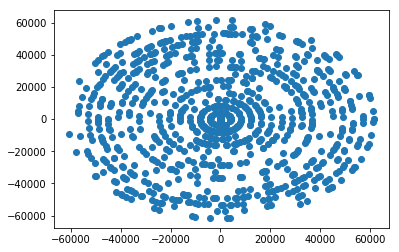

In [22]:
equis= np.array(xs)
ies=np.array(ys)
plt.scatter(equis,ies)#,angulos)
plt.show()

In [ ]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b